In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
saldf = pd.read_csv('/content/drive/MyDrive/Internship/Datasets/BP_BMI_Dataset.csv')

In [ ]:
saldf.head()

,BMI,BP_Sy,BP_Di
0,31.7,164.0,66.0
1,21.5,126.0,74.0
2,18.1,136.0,71.0
3,23.7,146.0,82.0
4,38.9,120.0,83.0


In [ ]:
saldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7132 entries, 0 to 7131
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMI     7018 non-null   float64
 1   BP_Sy   6143 non-null   float64
 2   BP_Di   6143 non-null   float64
dtypes: float64(3)
memory usage: 167.3 KB


In [ ]:
saldf.dropna(inplace=True)

In [ ]:
saldf.isnull().sum()

,0
BMI,0
BP_Sy,0
BP_Di,0


In [ ]:
inp = saldf[['BMI']]
out = saldf['BP_Sy']

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(inp,out)

LinearRegression()

In [ ]:
LR.predict([[5]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([108.71757166])

### Raw BMI vs. Systolic Blood Pressure

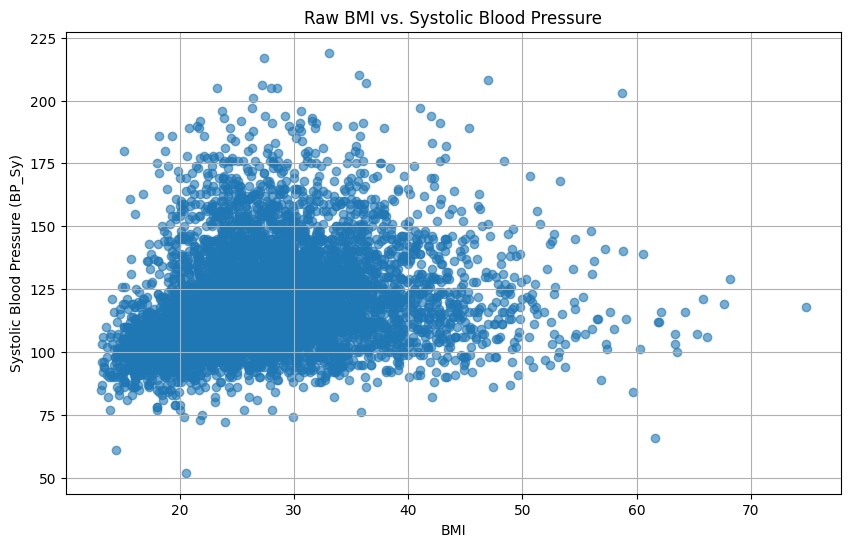

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(saldf['BMI'], saldf['BP_Sy'], alpha=0.6)
plt.xlabel('BMI')
plt.ylabel('Systolic Blood Pressure (BP_Sy)')
plt.title('Raw BMI vs. Systolic Blood Pressure')
plt.grid(True)
plt.show()n

### Original BMI vs. Systolic Blood Pressure with Encoded Model Regression Line

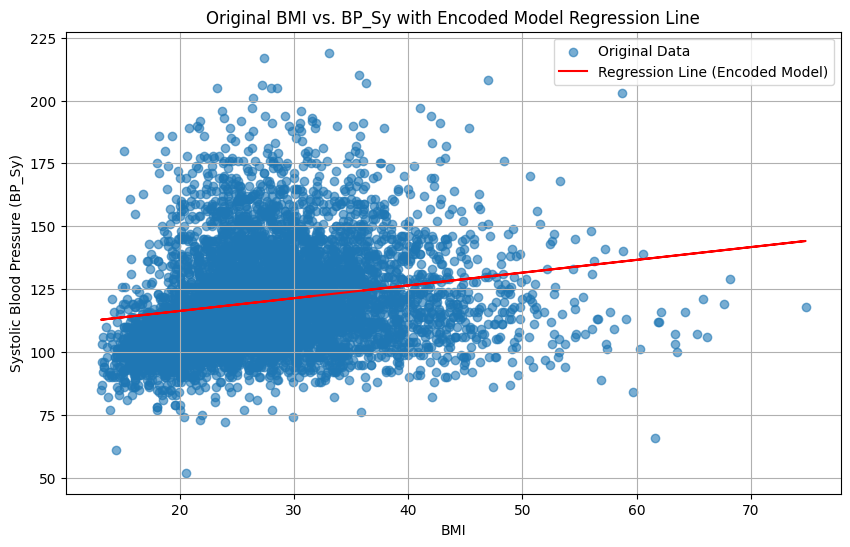

In [ ]:
predictions_scaled = LR_scaled.predict(scaled_bmi)

plt.figure(figsize=(10, 6))
plt.scatter(saldf['BMI'], saldf['BP_Sy'], alpha=0.6, label='Original Data')
plt.plot(saldf['BMI'], predictions_scaled, color='red', label='Regression Line (Encoded Model)')
plt.xlabel('BMI')
plt.ylabel('Systolic Blood Pressure (BP_Sy)')
plt.title('Original BMI vs. BP_Sy with Encoded Model Regression Line')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(saldf[['BMI']])


decoded_bmi = scaler.inverse_transform(scaled_bmi)

print("First 5 original BMI values:\n", saldf['BMI'].head().values)
print("\nFirst 5 decoded BMI values:\n", decoded_bmi[:5].flatten())

First 5 original BMI values:
 [31.7 21.5 18.1 23.7 38.9]

First 5 decoded BMI values:
 [31.7 21.5 18.1 23.7 38.9]


In [ ]:
flattened_decoded_bmi = decoded_bmi.flatten()
original_bmi_values = saldf['BMI'].values

is_nearly_equal = np.allclose(flattened_decoded_bmi, original_bmi_values)

print(f"Inverse transformation successfully recovered original BMI values: {is_nearly_equal}")

Inverse transformation successfully recovered original BMI values: True
